# Estudio completo de un problema de ML con Python
### Estimación del precio de una vivienda 

En este notebook haremos un análisis exploratorio básico de la base de datos de viviendas [House Sales in King County, USA](https://www.kaggle.com/harlfoxem/housesalesprediction), para familiarizarnos con los datos y posteriormente aplicar técnicas de machine learning sobre ellos. 

Lo primero es echar un ojo a la fuente; en este caso es Kaggle, por lo que disponéis de muchísima información sobre los datos (no os acostumbréis).

Sabemos que para cada vivienda, se tienen los siguientes atributos, características o features:

| Atributo | descripción |
| :- |:- |
|*id*| identificador de la vivienda|
| *date*| fecha
| *price*| precio
| *bedrooms*| número de habitaciones
| *bathrooms*| número de baños/aseos
| *sqtf_living*| superficie habitable (en pies al cuadrado)
| *sqft_lot*| superficie de la parcela (en pies al cuadrado)
| *floors*| número de plantas
| *waterfront*| indica si la vivienda tiene acceso a un lago
| *view*| tipo de vista (variable numérica)
| *condition*| condición de la vivienda (variable númerica)
| *grade*| medida de la calidad de la construcción (variable numérica)
| *sqft_above*| superficie por encima del suelo (en pies al cuadrado)
| *sqft_basement*| superficie del sótano (en pies al cuadrado)
| *yr_built*| año de construcción de la vivienda
| *yr_renovated*| año de renovación de la vivienda
| *lat*| latitud de la parcela
| *long*| longitud de la parcela
| *sqft_living15*| superficie habitable promedio de los 15 vecinos más cercanos 				
| *sqft_lot15*| superficie de la parcela promedio de los 15 vecinos más cercanos

Vamos a utilizar **DataFrames** de [Pandas](http://pandas.pydata.org/). Como es sabido, Pandas es un módulo de python de código abierto para el análisis de datos, que proporciona estructuras de datos fáciles de utilizar. Como guía de referencia básica, puede consultarse la [cheat sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)

In [1]:
import numpy  as np  
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## 1. Carga de datos y división train/test

Hay que tener mucho cuidado a la hora de realizar la división, para no cometer data leakage. Yo recomiendo que echéis un ojo al dataset, eliminéis todas aquellas columnas que sabéis que podéis quitar gracias a vuestro conocimiento del dominio (ids, URLs, etc) y a continuación dividáis en train/test para evitar riesgos.

In [2]:
house_data = pd.read_csv("./data/king_county.csv") # cargamos fichero
print(house_data.shape)
house_data.head(5).T                                 # visualizamos 5 primeras filas

(21613, 21)


,0,1,2,3,4
id,7129300520,6414100192,5631500400,2487200875,1954400510
date,20141013T000000,20141209T000000,20150225T000000,20141209T000000,20150218T000000
price,221900.0,538000.0,180000.0,604000.0,510000.0
bedrooms,3.0,3.0,2.0,4.0,3.0
bathrooms,1.0,2.25,1.0,3.0,2.0
sqft_living,1180,2570,770,1960,1680
sqft_lot,5650,7242,10000,5000,8080
floors,1.0,2.0,1.0,1.0,1.0
waterfront,0,0,0,0,0
view,0,0,0,0,0


El método `train_test_split` es mucho más potente que lo que hemos visto hasta ahora en clase, y permite hacer muchas más cosas. De momento siempre hemos particionado en cuatro (xtrain, xtest, ytrain, ytest) obteniendo arrays de numpy, pero no es la única opción. Aquí tenéis un único fichero .csv, y podéis usar la función para obtener dos subconjuntos: train y test.

In [3]:
from sklearn.model_selection import train_test_split

full_df = pd.read_csv("./data/king_county.csv")
train, test = train_test_split(full_df, test_size=0.2, shuffle=True, random_state=0)

print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')

# Guardamos
train.to_csv('./data/king_county_train.csv', sep=';', decimal='.', index=False)
test.to_csv('./data/king_county_test.csv', sep=';', decimal='.', index=False)

# A partir de este momento cargamos el dataset de train y trabajamos ÚNICAMENTE con él. 

house_data = pd.read_csv('./data/king_county_train.csv', sep=';', decimal='.')
house_data.head(5).T

Dimensiones del dataset de training: (17290, 21)
Dimensiones del dataset de test: (4323, 21)


,0,1,2,3,4
id,5100402668,7856560480,2872900010,3216900070,976000790
date,20150218T000000,20140808T000000,20150414T000000,20140617T000000,20141020T000000
price,495000.0,635000.0,382500.0,382500.0,670000.0
bedrooms,3.0,3.0,3.0,4.0,3.0
bathrooms,1.0,2.5,1.5,2.5,2.5
sqft_living,1570,1780,1090,2210,1800
sqft_lot,5510,11000,9862,7079,4763
floors,1.0,1.0,1.0,2.0,2.0
waterfront,0,0,0,0,0
view,0,0,0,0,0


## 2. Análisis exploratorio

Podemos analizar la estructura básica del dataset con las funciones de Pandas que ya conocemos: `describe`, `dtypes`, `shape`, etc.

Vamos a usar un profiler para que veáis cómo funciona: [ydata-profiling](https://github.com/ydataai/ydata-profiling)

In [ ]:
#!pip install ydata-profiling

In [4]:
from ydata_profiling import ProfileReport

profile = ProfileReport(house_data, title="Profiling Report")

In [5]:
profile.to_file("your_report.html")

Export report to file: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 17.86it/s]


In [6]:
house_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.729000e+04,1.729000e+04,17283.000000,17290.000000,17290.000000,1.729000e+04,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000
mean,4.564476e+09,5.427998e+05,3.368050,2.118291,2081.416715,1.524188e+04,1.498062,0.008155,0.238057,3.406709,7.660035,1788.299595,293.117120,1970.964199,87.387681,98077.935223,47.560451,-122.214191,1987.475072,12834.458415
std,2.864976e+09,3.724390e+05,0.943118,0.772249,923.244576,4.227028e+04,0.542603,0.089939,0.771108,0.650152,1.176428,831.889615,443.630392,29.485431,408.417400,53.505656,0.138624,0.140745,686.255379,27766.934680
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.514000,399.000000,651.000000
25%,2.125400e+09,3.240000e+05,3.000000,1.750000,1420.000000,5.033250e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.472400,-122.328000,1490.000000,5100.000000
50%,3.902300e+09,4.530000e+05,3.000000,2.250000,1920.000000,7.588500e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.573100,-122.231500,1840.000000,7619.000000
75%,7.297925e+09,6.475000e+05,4.000000,2.500000,2550.000000,1.071300e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,570.000000,1997.000000,0.000000,98117.000000,47.677900,-122.125000,2360.000000,10099.500000
max,9.895000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6110.000000,871200.000000


In [7]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17290 entries, 0 to 17289
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             17290 non-null  int64  
 1   date           17290 non-null  object 
 2   price          17290 non-null  float64
 3   bedrooms       17283 non-null  float64
 4   bathrooms      17290 non-null  float64
 5   sqft_living    17290 non-null  int64  
 6   sqft_lot       17290 non-null  int64  
 7   floors         17290 non-null  float64
 8   waterfront     17290 non-null  int64  
 9   view           17290 non-null  int64  
 10  condition      17290 non-null  int64  
 11  grade          17290 non-null  int64  
 12  sqft_above     17290 non-null  int64  
 13  sqft_basement  17290 non-null  int64  
 14  yr_built       17290 non-null  int64  
 15  yr_renovated   17290 non-null  int64  
 16  zipcode        17290 non-null  int64  
 17  lat            17290 non-null  float64
 18  long  

<div class = "alert alert-success">
EJERCICIO 3.6: Aunque no es fácil de ver, hay un outlier *extremo* ahí arriba. ¿Cuál es?
</div>

In [8]:
house_data.isnull().any()

id               False
date             False
price            False
bedrooms          True
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

#### Imputación

Vemos que la variable `bedrooms` tiene valores ausentes; hay que imputar. Es muy sencillo con pandas, usando fillna:

`df["Feature"].fillna(df["Feature"].mode()[0], inplace=True)`

Se puede rellenar con la moda (valor más frecuente), en otras ocasiones es preferible usar la media, y en algunos (pocos) casos se puede hacer con ceros.

También hay métodos más sofisticados como el [KNNImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html) de sklearn

In [9]:
house_data['bedrooms'].fillna(house_data['bedrooms'].mode()[0], inplace=True)
house_data.isnull().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

Vamos a ver qué es esa variable `date`, no encaja demasiado con el resto del dataset:

In [10]:
# Podemos ordenar un dataframe con esta sintaxis:
sorted_df = house_data.sort_values(by='date')
sorted_df['date'].head(10)

5351     20140502T000000
8061     20140502T000000
13292    20140502T000000
13532    20140502T000000
4503     20140502T000000
12247    20140502T000000
14506    20140502T000000
4900     20140502T000000
11095    20140502T000000
10834    20140502T000000
Name: date, dtype: object

In [11]:
# Y para orden inverso:
sorted_df = house_data.sort_values(by='date', ascending=False)
sorted_df['date'].head(10)

9915     20150527T000000
4992     20150524T000000
16974    20150515T000000
3163     20150514T000000
9196     20150514T000000
10924    20150514T000000
16506    20150514T000000
15428    20150514T000000
2558     20150514T000000
992      20150514T000000
Name: date, dtype: object

Vemos que la columna va de 2014 a 2015, y probablemente haga referencia a la fecha de venta. No interesa.

In [12]:
house_data.dtypes

id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

#### Codificación de variables categóricas

Podemos observar que todas las variables son de tipo numérico, así que no tenemos que codificar ninguna de ellas. Pero... y si necesitáramos hacerlo? 

[MeanEncoder](https://maxhalford.github.io/blog/target-encoding/): en sklearn se llama [TargetEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.TargetEncoder.html). Asigna un valor a cada variable categórica según la media de la columna objetivo para el conjunto de registros que tienen esa variable categórica. Es decir, si quisiera categorizar la variable "Barrio" con un ME, lo que tendría que hacer es calcular la media de precio en cada barrio (Villaverde, Chamberí, etc) y sustituir el nombre del barrio por esa media. Ojito con el data leakage, os dejo un ejemplo debajo de cómo hacerlo bien.

Tutoriales sobre codificación de variables categóricas: [Tutorial 1](https://towardsdatascience.com/encoding-categorical-features-21a2651a065c), [tutorial 2](https://towardsdatascience.com/all-about-categorical-variable-encoding-305f3361fd02)

In [ ]:
# Target encoder hace algo así por debajo:

"""
categorical = ['cat1', 'cat2', 'cat3']

mean_map = {}
for c in categorical:
    mean = data.groupby(c)['target'].mean()
    data[c] = data[c].map(mean)    
    mean_map[c] = mean

# Si hubiera test, luego se haría:
#for c in categorical:
#    data_test[c] = data_test[c].map(mean_map[c])

data.head()
"""

Este es uno de los tutoriales más completos que he visto: [Encoding done the right way](https://maxhalford.github.io/blog/target-encoding/) y me hace especial gracia porque dice esto: "Label encoding is useless and you should never use it". No estoy 100% de acuerdo obviamente :) pero sí que es cierto que cuando hay muchas categorías (es decir, no es binario) un LE puede llevar a errores porque asigna números a cada una de ellas, con lo cual el algoritmo puede "aprender" erróneamente. Supongamos que tengo una categoría barrio que quiero categorizar:

- Barrio céntrico moderno y caro -> LE -> 1
- Otro barrio -> LE -> 2
- Otro más -> LE -> 3
- Y otro -> LE -> 4
- Barrio periférico y obrero -> LE -> 5

Mis categorías tras el LE pasarían a ser 1-5, pero qué quiere decir esto? Que 5 es mayor que 1? Que 3 es menor que 5? No, porque no existe esa relación entre los barrios, pero SÍ entre los números! Entonces el algoritmo podría decidir que de alguna manera "Barrio periférico y obrero > Barrio céntrico moderno y caro" porque 5 > 1.

Otro encoder que podéis usar y que va bastante bien es el [OrdinalEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html).

----------------------------------------

Volviendo al análisis, los atributos *id* y *date* no nos aportan información, así que los descartamos del DataFrame:

In [13]:
# Eliminamos las columnas id y date 
house_data = house_data.drop(['id','date'], axis=1)
house_data.head(5).T

,0,1,2,3,4
price,495000.0000,635000.0000,382500.0000,382500.0000,670000.000
bedrooms,3.0000,3.0000,3.0000,4.0000,3.000
bathrooms,1.0000,2.5000,1.5000,2.5000,2.500
sqft_living,1570.0000,1780.0000,1090.0000,2210.0000,1800.000
sqft_lot,5510.0000,11000.0000,9862.0000,7079.0000,4763.000
floors,1.0000,1.0000,1.0000,2.0000,2.000
waterfront,0.0000,0.0000,0.0000,0.0000,0.000
view,0.0000,0.0000,0.0000,0.0000,0.000
condition,4.0000,4.0000,3.0000,3.0000,3.000
grade,7.0000,8.0000,8.0000,8.0000,7.000


Antes seguir con nuestro análisis, vamos a transformar las variables de superficie para expresarlas en $m^2$. Posteriormente, renombraremos las columnas.

In [15]:
feetFeatures = [item for item in list(house_data.columns) if 'sqft' in item]
feetFeatures

['sqft_living',
 'sqft_lot',
 'sqft_above',
 'sqft_basement',
 'sqft_living15',
 'sqft_lot15']

In [16]:
# convertir las variables en pies al cuadrado en metros al cuadrado 
def sqft_to_m2(superficie):
    return superficie * 0.3048 * 0.3048

house_data[feetFeatures] = house_data[feetFeatures].apply(sqft_to_m2)

# Alternativa usando una función lambda
# house_data[feetFeatures] = house_data[feetFeatures].apply(lambda x: x * 0.3048 * 0.3048)

# renombramos
house_data.columns = ['price','bedrooms','bathrooms','sqm_living','sqm_lot','floors','waterfront','view','condition',
                      'grade','sqm_above','sqm_basement','yr_built','yr_renovated','zip_code','lat','long',
                      'sqm_living15','sqm_lot15']

# visualizamos
house_data.head(5)

,price,bedrooms,bathrooms,sqm_living,sqm_lot,floors,waterfront,view,condition,grade,sqm_above,sqm_basement,yr_built,yr_renovated,zip_code,lat,long,sqm_living15,sqm_lot15
0,495000.0,3.0,1.0,145.857773,511.89575,1.0,0,0,4,7,99.406253,46.451520,1940,0,98115,47.6942,-122.319,164.438381,592.721395
1,635000.0,3.0,2.5,165.367411,1021.93344,1.0,0,0,4,8,112.412678,52.954733,1980,0,98006,47.5574,-122.149,214.606022,901.159488
2,382500.0,3.0,1.5,101.264314,916.20978,1.0,0,0,3,8,101.264314,0.000000,1987,0,98074,47.6256,-122.036,158.864198,916.209780
3,382500.0,4.0,2.5,205.315718,657.66062,2.0,0,0,3,8,205.315718,0.000000,1993,0,98031,47.4206,-122.183,183.018989,650.321280
4,670000.0,3.0,2.5,167.225472,442.49718,2.0,0,0,3,7,115.199770,52.025702,1985,0,98119,47.6460,-122.362,166.296442,442.497180


## 3. Visualización (y más análisis)

Una buena práctica es intentar resumir toda la información posible de los datos. Habitualmente nos interesa saber la media y desviación estándar, posiblemente cuartiles de cada una de las variables. Esto nos permitirá, por una lado, tener una idea de cómo son las ditribuciones de cada una de las variables y por otra, nos permitirá verificar si existen datos anómalos, también conocidos como [**outliers**](https://en.wikipedia.org/wiki/Outlier). 

Además, conviene siempre hacer representaciones gráficas, que nos ofrecen, en general un mejor entendimiento de los datos. Para ello vamos representar los histogramas de algunos atributos: *bedrooms*, *sqm_living* y *yr_built*

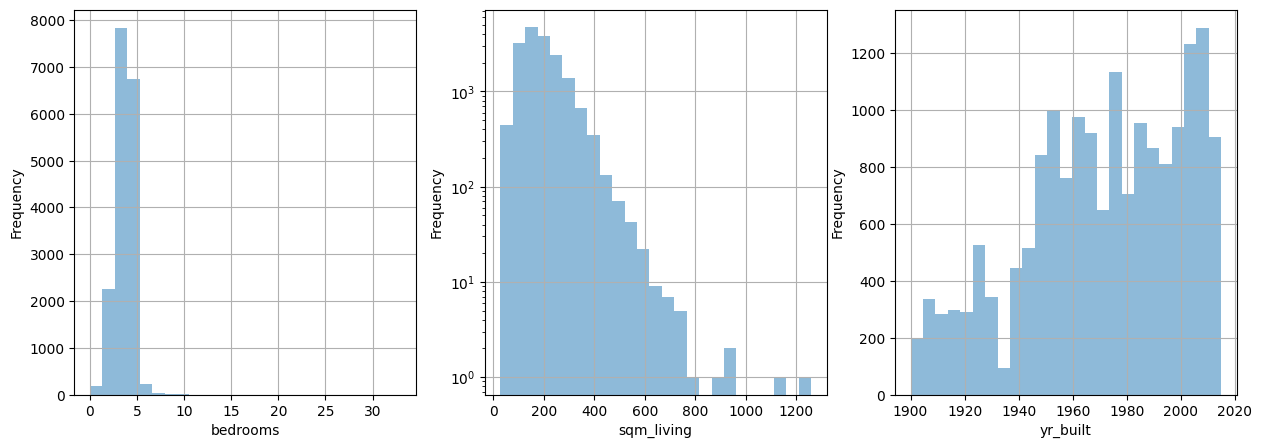

In [20]:
plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
house_data['bedrooms'].plot.hist(alpha=0.5, bins=25, grid = True)
#plt.ylim(0, 15)
plt.xlabel('bedrooms')

plt.subplot(1,3,2)
house_data['sqm_living'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.yscale("log")
plt.xlabel('sqm_living')

plt.subplot(1,3,3)
house_data['yr_built'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('yr_built')

plt.show()

Una vez que hemos analizado las variables por separado, el siguiente paso en un análisis exploratorio sería el entender las relaciones entre cada una de las variables/atributos ($\mathbf{x}$) y la variable respuesta ($y$). 

Para ello vamos a utilizar un [scatter plot](https://en.wikipedia.org/wiki/Scatter_plot) con la variable objetivo definida $y$ como variable dependiente, y alguna una de las variables explicativas como variables independientes. En el caso de la variable *waterfront*, dado que ésta es binaria, vamos a utilizar un [boxplot](https://en.wikipedia.org/wiki/Box_plot).

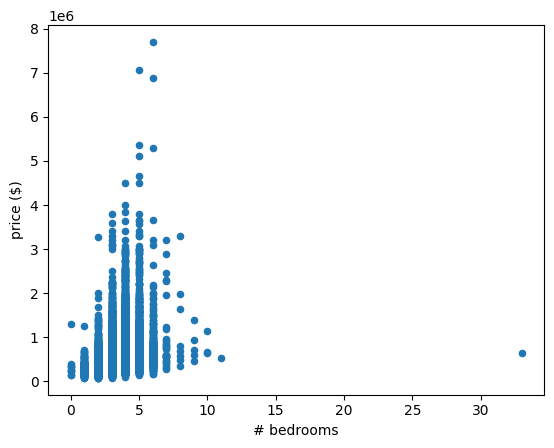

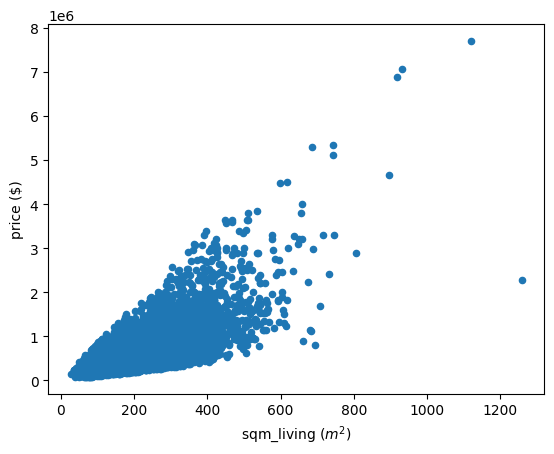

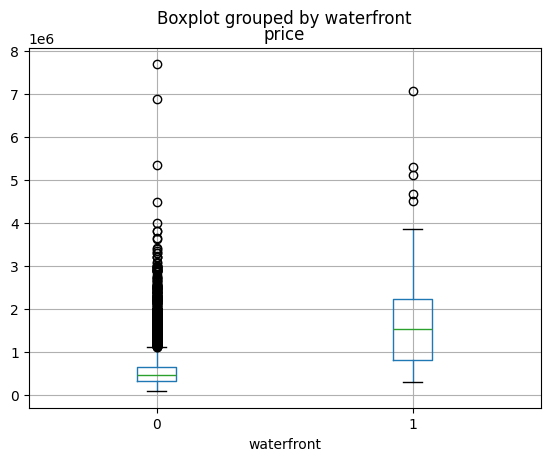

In [21]:
# Sólo representamos 3: bedrooms, sqm_living y waterfront
# el resto se puede repetir una a una

house_data.plot(kind = 'scatter',x='bedrooms',y = 'price')
plt.xlabel('# bedrooms')
plt.ylabel('price ($)')
plt.show()

house_data.plot(kind = 'scatter',x='sqm_living',y = 'price')
plt.xlabel('sqm_living ($m^2$)')
plt.ylabel('price ($)')
plt.show()

house_data.boxplot(by='waterfront',column = 'price')
plt.show()

In [22]:
house_data['waterfront'].value_counts()

waterfront
0    17149
1      141
Name: count, dtype: int64

In [23]:
house_data['bedrooms'].value_counts()

bedrooms
3.0     7837
4.0     5437
2.0     2257
5.0     1307
6.0      225
1.0      166
7.0       32
0.0       11
8.0        8
9.0        5
10.0       3
11.0       1
33.0       1
Name: count, dtype: int64

Podemos estudiar algunas de las variables con `.value_counts()`, por ejemplo *waterfront* o *bedrooms*.

<div class = "alert alert-success">
EJERCICIO 3.7: Analizar los `value_counts` de *waterfront* y *bedrooms*
</div>

#### Eliminación de outliers

Tanto con los scatter plot de arriba como con los análisis de `value_counts`, vemos que hay unos pocos outliers en la variable bedrooms (y en sqm_living). Vamos a eliminarlos con un filtro. Si recordáis, vimos en el repaso de Pandas que los dataframes podían filtrarse con `df_filtered = df[condición]`:

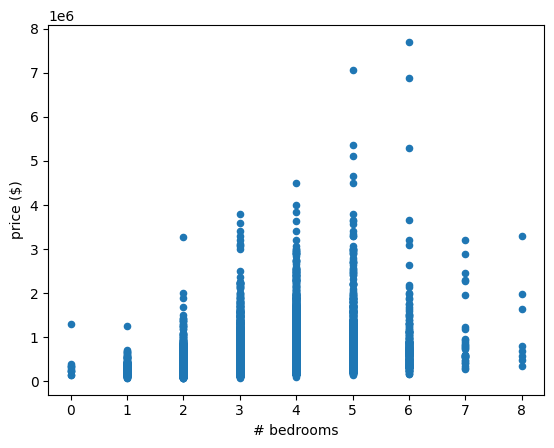

In [24]:
house_data_no_outliers_bedrooms = house_data[house_data['bedrooms'] <= 8]

house_data_no_outliers_bedrooms.plot(kind = 'scatter',x='bedrooms',y = 'price')
plt.xlabel('# bedrooms')
plt.ylabel('price ($)')
plt.show()

¿Hemos perdido muchos datos con la eliminación?

In [25]:
print(
    f'Original: {house_data.shape[0]} // '
    f'Modificado: {house_data_no_outliers_bedrooms.shape[0]}\nDiferencia: {house_data.shape[0] - house_data_no_outliers_bedrooms.shape[0]}'
)
print(f'Variación: {((house_data.shape[0] - house_data_no_outliers_bedrooms.shape[0])/house_data.shape[0])*100:2f}%')

Original: 17290 // Modificado: 17280
Diferencia: 10
Variación: 0.057837%


<div class = "alert alert-success">
EJERCICIO 3.8: Repetir el estudio de outliers para la variable *sqm_living*
</div>

Una vez que hemos hecho un primer análisis exploratorio, el siguiente paso consiste en evaluar las correlaciones entre las diferente variables del problema. Habitualmente, esto nos puede servir para identificar posibles atributos que estén altamente correlacionados. 

Si la correlación entre dos atributos es muy grande, se dice que la matriz de atributos es singular, y como ya vimos, esto es una fuente de error importante en algunos algoritmos de machine learning, como por ejemplo en el caso de la [regresión lineal](https://es.wikipedia.org/wiki/Regresión_lineal). 

Este problema se denomina *colinealidad*. Para hacer frente a él, normalmente se evalúa [coeficiente de correlación](https://es.wikipedia.org/wiki/Coeficiente_de_correlación_de_Pearson) ($\rho$) entre las diferentes atributos de tal forma que se descartan que tengan un $\rho$ superior a un umbral que establezcamos a priori ($|\rho|>0.9$, por ejemplo). Hay que tener en cuenta que $-1<\rho<1$, de tal forma que valores próximos a $0$ indican que no hay correlación y valores próximos a $1$ o $-1$ indican una alta correlación.

La matriz de correlación se puede sacar de Pandas:

In [26]:
house_data.corr() # matriz de correlación

,price,bedrooms,bathrooms,sqm_living,sqm_lot,floors,waterfront,view,condition,grade,sqm_above,sqm_basement,yr_built,yr_renovated,zip_code,lat,long,sqm_living15,sqm_lot15
price,1.000000,0.312804,0.525141,0.703934,0.090189,0.254904,0.284217,0.404110,0.038920,0.662764,0.607632,0.325542,0.049801,0.132875,-0.048894,0.302513,0.018897,0.583515,0.081235
bedrooms,0.312804,1.000000,0.516930,0.578387,0.033136,0.174807,-0.001960,0.083343,0.027259,0.359274,0.478835,0.305782,0.153887,0.024100,-0.152844,-0.004710,0.131544,0.393142,0.029480
bathrooms,0.525141,0.516930,1.000000,0.753762,0.086788,0.498389,0.072510,0.191432,-0.127306,0.666061,0.685465,0.283289,0.501465,0.056244,-0.200786,0.027612,0.222953,0.564955,0.087408
sqm_living,0.703934,0.578387,0.753762,1.000000,0.172964,0.348108,0.116158,0.290615,-0.057750,0.762001,0.877309,0.435994,0.312167,0.063597,-0.200739,0.051750,0.241466,0.755298,0.181921
sqm_lot,0.090189,0.033136,0.086788,0.172964,1.000000,-0.008114,0.023224,0.080922,-0.003988,0.115428,0.185184,0.012704,0.052083,0.010068,-0.130641,-0.090768,0.232157,0.145505,0.737597
floors,0.254904,0.174807,0.498389,0.348108,-0.008114,1.000000,0.026991,0.029165,-0.262641,0.458368,0.519127,-0.249007,0.487902,0.012559,-0.053448,0.053186,0.119765,0.271782,-0.013389
waterfront,0.284217,-0.001960,0.072510,0.116158,0.023224,0.026991,1.000000,0.415696,0.022409,0.088524,0.082994,0.086108,-0.028266,0.093315,0.033800,-0.014361,-0.043710,0.090154,0.030706
view,0.404110,0.083343,0.191432,0.290615,0.080922,0.029165,0.415696,1.000000,0.045916,0.253976,0.173345,0.279749,-0.053887,0.106137,0.085350,0.004518,-0.079983,0.280023,0.075726
condition,0.038920,0.027259,-0.127306,-0.057750,-0.003988,-0.262641,0.022409,0.045916,1.000000,-0.143332,-0.157515,0.175186,-0.366491,-0.061278,0.003210,-0.011851,-0.108620,-0.092102,-0.002390
grade,0.662764,0.359274,0.666061,0.762001,0.115428,0.458368,0.088524,0.253976,-0.143332,1.000000,0.755131,0.169797,0.447102,0.019269,-0.183222,0.113700,0.200080,0.709406,0.121298


Pero es mejor representarla:

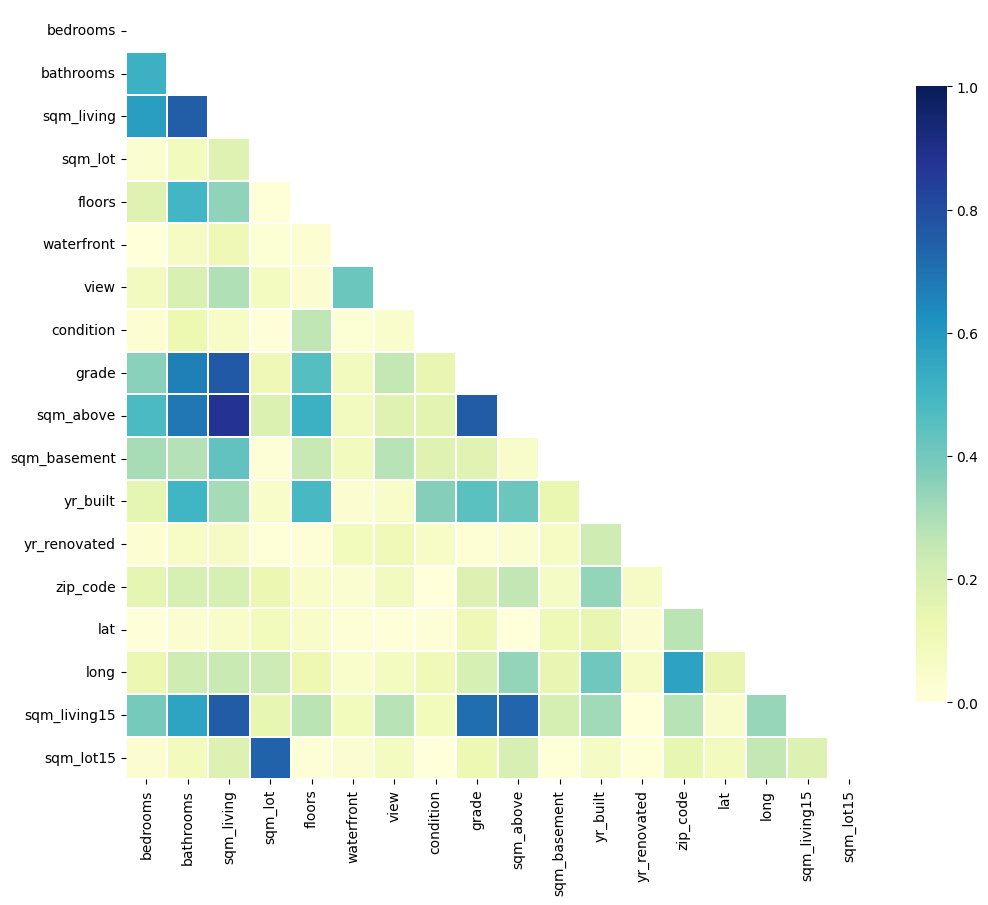

In [27]:
import seaborn as sns

# Compute the correlation matrix
corr = np.abs(house_data.drop(['price'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

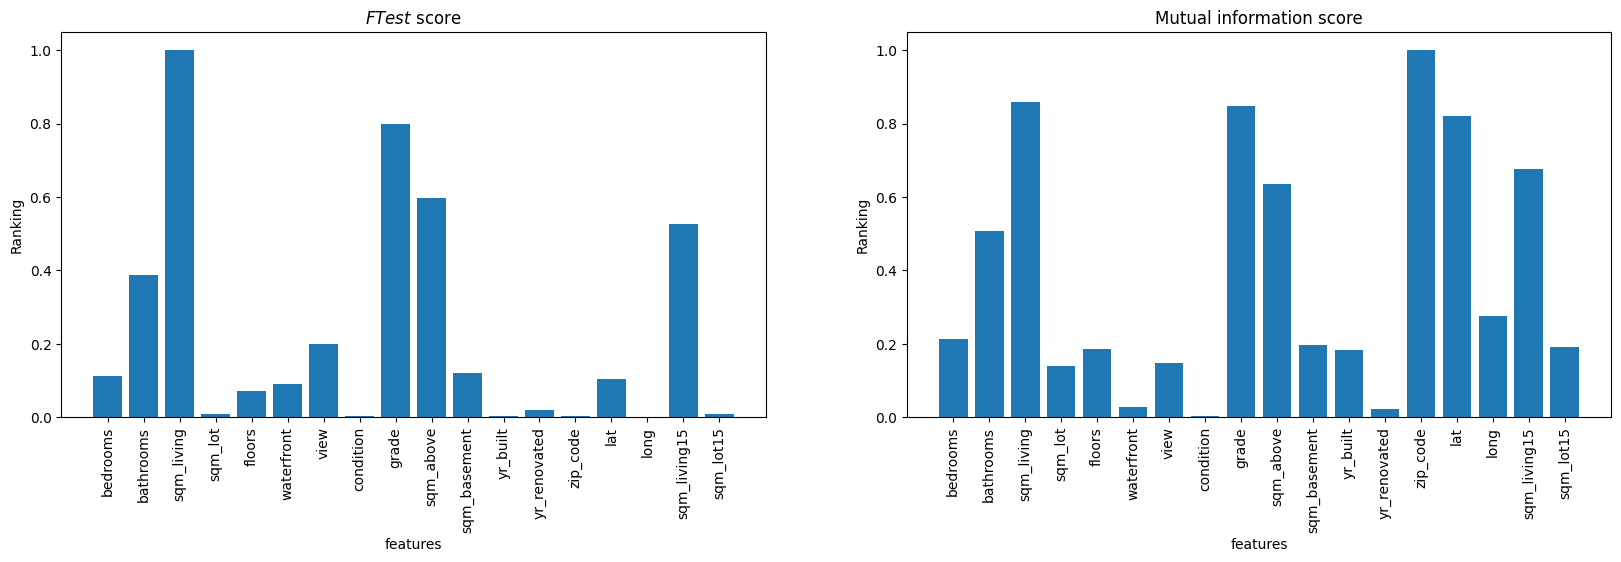

In [29]:
from sklearn.feature_selection import f_regression, mutual_info_regression

# convertimos el DataFrame al formato necesario para scikit-learn
data = house_data.values

y = data[:,0:1]     # nos quedamos con la 1ª columna, price
X = data[:,1:]      # nos quedamos con el resto

feature_names_mi = house_data.columns[1:]

# estudiamos los dos métodos de filtrado
f_test, _ = f_regression(X, y)
f_test /= np.max(f_test)

mi = mutual_info_regression(X, y)
mi /= np.max(mi)

# visualización
plt.figure(figsize=(20, 5))

plt.subplot(1,2,1)
plt.bar(range(X.shape[1]),f_test,  align="center")
plt.xticks(range(X.shape[1]),feature_names_mi, rotation = 90)
plt.xlabel('features')
plt.ylabel('Ranking')
plt.title('$F Test$ score')

plt.subplot(1,2,2)
plt.bar(range(X.shape[1]),mi, align="center")
plt.xticks(range(X.shape[1]),feature_names_mi, rotation = 90)
plt.xlabel('features')
plt.ylabel('Ranking')
plt.title('Mutual information score')

plt.show()

Basándonos en el estudio podríamos llegar a valorar eliminar la variable *sqm_above*.

Por último, podemos hacer una representación (scatter_plot) de todas las variables frente al resto, para tener una idea de cómo se relacionan las variables del problema.

In [ ]:
pd.plotting.scatter_matrix(house_data, alpha=0.2, figsize=(20, 20), diagonal = 'kde')
plt.show()

## 4. Generación de nuevas características

Este sería el momento de pensar sobre otras variables que tuvieran sentido. Por ejemplo:

- Construir el atributo antigüedad de la casa en vez de año de la construcción.
- Intentar capturar la relación entre dormitorios y baños
- Cualquier otra idea que tengáis. Por ejemplo, para este dataset en concreto la gente encontró que elevar al cuadrado el número de dormitorios era una variable relevante; la explicación (o eso se cree) es que muchas de estas casas habían subdividido habitaciones para poder introducir a más inquilinos, a veces incluso a costa de las zonas comunes. Por tanto, un número de dormitorios mayor era mejor _hasta cierto punto_, lo cual quedaba recogido al elevar al cuadrado. Fijaos como en el scatter plot de bedroom podemos ver esta misma tendencia.

In [30]:
house_data['years']            = 2015 - house_data['yr_built']
house_data['bedrooms_squared'] = house_data['bedrooms'].apply(lambda x: x**2)
house_data['bed_bath_rooms']   = house_data['bedrooms']*house_data['bathrooms']

# ... etc

## 5. Modelado, cross-validation y estudio de resultados en train y test

Ha llegado el gran momento! Antes de modelar, tenemos que cargar los datos de test y aplicar exactamente las mismas transformaciones. Es buena práctica, llegado este momento, combinar todo nuestro preprocesamiento en una única celda:

In [31]:
# Carga de datos
house_data = pd.read_csv('./data/king_county_train.csv', sep=';', decimal='.')

# Imputación
house_data['bedrooms'].fillna(house_data['bedrooms'].mode()[0], inplace=True)

# Eliminamos las columnas id y date 
house_data = house_data.drop(['id','date'], axis=1)

# Convertimos las variables en pies al cuadrado en metros al cuadrado y renombramos
feetFeatures = ['sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_living15','sqft_lot15']

def sqft_to_m2(superficie):
    return superficie * 0.3048 * 0.3048

house_data[feetFeatures] = house_data[feetFeatures].apply(sqft_to_m2)
house_data.columns = ['price','bedrooms','bathrooms','sqm_living','sqm_lot','floors','waterfront','view','condition',
                      'grade','sqm_above','sqm_basement','yr_built','yr_renovated','zip_code','lat','long',
                      'sqm_living15','sqm_lot15']

# Eliminamos outliers en bedrooms
house_data = house_data[house_data['bedrooms'] <= 8]

# Generamos características
house_data['years']            = 2015 - house_data['yr_built']
house_data['bedrooms_squared'] = house_data['bedrooms'].apply(lambda x: x**2)
house_data['bed_bath_rooms']   = house_data['bedrooms']*house_data['bathrooms']

Y ahora aplicamos fácilmente a test:

In [32]:
# Carga de datos
house_data_test = pd.read_csv('./data/king_county_test.csv', sep=';', decimal='.')

# Imputación
house_data_test['bedrooms'].fillna(house_data['bedrooms'].mode()[0], inplace=True)

# Eliminamos las columnas id y date 
house_data_test = house_data_test.drop(['id','date'], axis=1)

# Convertimos las variables en pies al cuadrado en metros al cuadrado y renombramos
feetFeatures = ['sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_living15','sqft_lot15']

def sqft_to_m2(superficie):
    return superficie * 0.3048 * 0.3048

house_data_test[feetFeatures] = house_data_test[feetFeatures].apply(sqft_to_m2)
house_data_test.columns = ['price','bedrooms','bathrooms','sqm_living','sqm_lot','floors','waterfront','view','condition',
                      'grade','sqm_above','sqm_basement','yr_built','yr_renovated','zip_code','lat','long',
                      'sqm_living15','sqm_lot15']

# Eliminamos outliers en bedrooms
house_data_test = house_data_test[house_data_test['bedrooms'] <= 8]

# Generamos características
house_data_test['years']            = 2015 - house_data_test['yr_built']
house_data_test['bedrooms_squared'] = house_data_test['bedrooms'].apply(lambda x: x**2)
house_data_test['bed_bath_rooms']   = house_data_test['bedrooms']*house_data_test['bathrooms']

Ahora podemos preparar los datos para sklearn:

In [33]:
from sklearn import preprocessing

# Dataset de train
data_train = house_data.values
y_train = data_train[:,0:1]     # nos quedamos con la 1ª columna, price
X_train = data_train[:,1:]      # nos quedamos con el resto

# Dataset de test
data_test = house_data_test.values
y_test = data_test[:,0:1]     # nos quedamos con la 1ª columna, price
X_test = data_test[:,1:]      # nos quedamos con el resto

Y si queremos, podemos normalizar, pero con los datos de train!

In [34]:
# Escalamos (con los datos de train)
scaler = preprocessing.StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)

# recordad que esta normalización/escalado la realizo con el scaler anterior, basado en los datos de training!
XtestScaled = scaler.transform(X_test) 

In [35]:
print('Datos entrenamiento: ', XtrainScaled.shape)
print('Datos test: ', XtestScaled.shape)

Datos entrenamiento:  (17280, 21)
Datos test:  (4322, 21)


Ahora vendría lo-de-siempre: cross validation, búsqueda de los parámetros óptimos, visualización de performance vs complejidad...

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END ..........................................alpha=0.1; total time=   2.9s
[CV] END ..........................................alpha=0.1; total time=   1.6s
[CV] END ..........................................alpha=0.1; total time=   1.3s
[CV] END ..........................alpha=0.37926901907322497; total time=   1.9s
[CV] END ..........................alpha=0.37926901907322497; total time=   2.0s
[CV] END ..........................alpha=0.37926901907322497; total time=   1.6s
[CV] END ............................alpha=1.438449888287663; total time=   2.2s
[CV] END ............................alpha=1.438449888287663; total time=   1.4s
[CV] END ............................alpha=1.438449888287663; total time=   1.5s
[CV] END .............................alpha=5.45559478116852; total time=   1.7s
[CV] END .............................alpha=5.45559478116852; total time=   1.8s
[CV] END .............................alpha=5.45

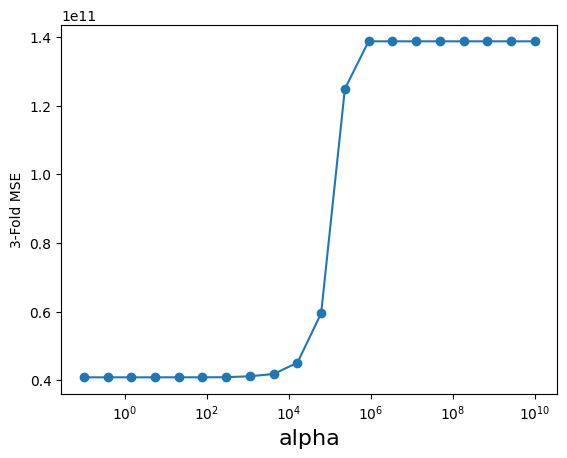

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

alpha_vector = np.logspace(-1,10,20)
param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Lasso(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 3, verbose=2)
grid.fit(XtrainScaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

#-1 porque es negado
scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('3-Fold MSE')
plt.show()

In [37]:
from sklearn.metrics import mean_squared_error

alpha_optimo = grid.best_params_['alpha']
lasso = Lasso(alpha = alpha_optimo).fit(XtrainScaled,y_train)

ytrainLasso = lasso.predict(XtrainScaled)
ytestLasso  = lasso.predict(XtestScaled)
mseTrainModelLasso = mean_squared_error(y_train,ytrainLasso)
mseTestModelLasso = mean_squared_error(y_test,ytestLasso)

print('MSE Modelo Lasso (train): %0.3g' % mseTrainModelLasso)
print('MSE Modelo Lasso (test) : %0.3g' % mseTestModelLasso)

print('RMSE Modelo Lasso (train): %0.3g' % np.sqrt(mseTrainModelLasso))
print('RMSE Modelo Lasso (test) : %0.3g' % np.sqrt(mseTestModelLasso))

feature_names = house_data.columns[1:] # es igual en train y en test

w = lasso.coef_
for f,wi in zip(feature_names,w):
    print(f,wi)

MSE Modelo Lasso (train): 4.04e+10
MSE Modelo Lasso (test) : 3.52e+10
RMSE Modelo Lasso (train): 2.01e+05
RMSE Modelo Lasso (test) : 1.88e+05
bedrooms -58018.20744777835
bathrooms -99329.01924076224
sqm_living 257572.52272897097
sqm_lot 8090.780268416649
floors 10460.062067887135
waterfront 54924.67983679049
view 39081.08868616896
condition 19483.281855768048
grade 115813.39047290584
sqm_above -93303.9337010838
sqm_basement -58071.68022158738
yr_built -82231.97356272582
yr_renovated 9007.982451483716
zip_code -31503.4504635945
lat 83313.39796500964
long -29913.16828629552
sqm_living15 18856.98945862758
sqm_lot15 -12901.174691537379
years -10014.00032375426
bedrooms_squared -64190.784204850715
bed_bath_rooms 197441.99908633507


Y a partir de aquí, habría que iterar. Los coeficientes son muy grandes; quizá queramos regularizar. O probar otros modelos. O reducir características. O...